Riya & Austin<br/>Section 3

# Question

# Model

### Setting up the environment

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [2]:
'''
S: Susceptible
Q: Quarantine
C: Coming to class
R: Recovered
D: Dead XP
'''

init = State(S=360, Q=0, C=1, R=0, D=0)

,values
S,360
Q,0
C,1
R,0
D,0


In [3]:
'''
i: contagion rate
p: proportion quarantined
g: "go home" rate (a.k.a. C->Q rate)
alpha: quarantined recovery rate
beta: quarantined death rate
gamma: coming to class recovery rate
sigma: coming to class death rate
'''

system = System(
    i=1,
    p=0.4,
    g=0.6,
    alpha=0.4,
    beta=0.1,
    gamma=0.001,
    sigma=0.3
)

,values
i,1.000
p,0.400
g,0.600
alpha,0.400
beta,0.100
gamma,0.001
sigma,0.300


In [27]:
def update_func(state, system, dt=1):
    unpack(state)
    unpack(system)
    
    if S <= 0:
        delta = 0
    else:
        delta = i/S

    infections = min([S * C * delta, S])
    recoveries = min([Q*alpha + C*gamma, 360])
    deaths     = min([Q*beta + C*sigma, 360])
    
    print ("S C Delta: ", S * C * delta)
    print ("S", S)
    
    dSdt = -infections * dt
    dQdt = (infections * p + C*g - Q*alpha - Q*beta) * dt
    dCdt = (infections * (1-p) - C*gamma - C*sigma) * dt
    dRdt = (recoveries) * dt
    dDdt = (deaths) * dt
    
    s,q,c,r,d = S,Q,C,R,D
    
    return State(
        S = s + dSdt,
        Q = q + dQdt,
        C = c + dCdt,
        R = r + dRdt,
        D = d + dDdt
    )

In [28]:
def run_simulation(system, init, t_end, dt):
    unpack(system)
    
    results = TimeFrame(columns=init.index)
    results.row[0] = init
    
    for t in linrange(0, t_end, dt):
        results.row[t+dt] = update_func(results.row[t], system, dt)
    
    return results

In [29]:
def plot_results(results):
    plot(results['S'], '-', label='Susceptible')
    plot(results['C'], '--', label='Coming to class')
    plot(results['Q'], ':', label='Quarantined')
    plot(results['R'], '.-', label='Recovered')
    plot(results['D'], '.', label='Dead')
    decorate(xlabel='Time (days)', ylabel='Population')

S C Delta:  1.0
S 360
S C Delta:  1.299
S 359.0
S C Delta:  1.6874010000000002
S 357.701
S C Delta:  2.191933899
S 356.013599
S C Delta:  2.847322134801
S 353.821665101
S C Delta:  3.6986714531064986
S 350.974342966199
S C Delta:  4.804574217585341
S 347.2756715130925
S C Delta:  6.241141908643359
S 342.47109729550715
S C Delta:  8.107243339327724
S 336.22995538686376
S C Delta:  10.531309097786712
S 328.122712047536
S C Delta:  13.68017051802494
S 317.5914029497493
S C Delta:  17.770541502914398
S 303.91123243172433
S C Delta:  23.083933412285802
S 286.14069092880993
S C Delta:  29.986029502559255
S 263.05675751652416
S C Delta:  38.95185232382447
S 233.0707280139649
S C Delta:  50.59845616864798
S 194.11887569014044
S C Delta:  65.72739456307373
S 143.52041952149247
S C Delta:  85.37988553743277
S 77.79302495841874
S C Delta:  0.0
S 0.0
S C Delta:  0.0
S 0.0
S C Delta:  0.0
S 0.0
S C Delta:  0.0
S 0.0
S C Delta:  0.0
S 0.0
S C Delta:  0.0
S 0.0
S C Delta:  0.0
S 0.0
S C Delta:  0.0
S

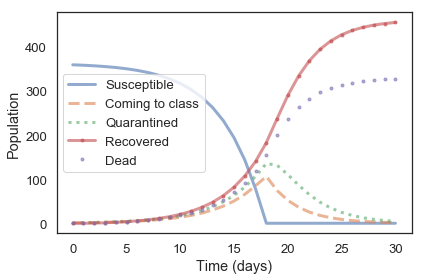

In [30]:
results = run_simulation(system, init, 30, 1)
plot_results(results)
print(results)

# Results

# Interpretation